In [2]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython import display
import seaborn as sns
%matplotlib inline

In [3]:
!pip install plotting

In [4]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)

# Needed to help our plots look cleaner with plotly 

In [5]:
#Importing the datasets
train_df = pd.read_csv('BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')
test_df = pd.read_csv('BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')

#### We dont want 2 csv files for prediction, So we can make it as one and build our model

In [6]:
df = pd.concat([train_df, test_df], axis = 0)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
30,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465
31,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
32,2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
33,2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769
34,2022-02-04,37234.058594,38121.738281,37093.628906,37649.335938,37649.335938,20987750400


In [55]:
# We need to reset the index 
df.reset_index(drop=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...,...
2223,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465
2224,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
2225,2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2226,2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769


In [10]:
# Look at the shape
# check the dimensions of the data
df.shape

(2228, 7)

In [11]:
# Checking for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##### Great we don't have any null values, we can proceed to further steps

In [12]:
# view descriptive statistics of adjusted close process of the stock
df[['Adj Close']].describe()

,Adj Close
count,2228.000000
mean,13460.158516
std,16723.528378
min,364.330994
25%,2670.775024
50%,7476.364991
75%,11586.823242
max,67566.828125


In [13]:
# Take quick look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 34
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.2+ KB


In [64]:
df['Date'].str.replace("-","").astype(int)

0     20160101
1     20160102
2     20160103
3     20160104
4     20160105
        ...   
30    20220131
31    20220201
32    20220202
33    20220203
34    20220204
Name: Date, Length: 2228, dtype: int32

In [17]:
## View the maximum close date of stock
df['Close'].max()

67566.828125

In [18]:
# calculate the mean volume for the stock
df['Volume'].mean()

17749985898.52693

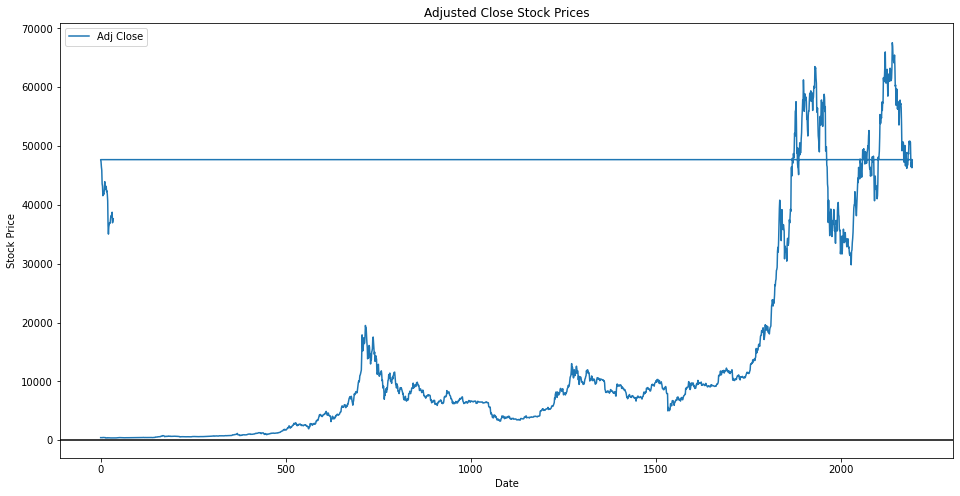

In [20]:
# Plot function for the Adjusted closing value
def plot_adj(df,title):
        ax = df['Adj Close'].plot(title=title, figsize=(16,8), ax=None)
        ax.set_xlabel("Date")
        ax.set_ylabel("Stock Price")
        ax.axhline(color='black')
        ax.legend(loc='upper left')
        plt.show()
# View the plot of Adjusted close       
plot_adj(df,"Adjusted Close Stock Prices")

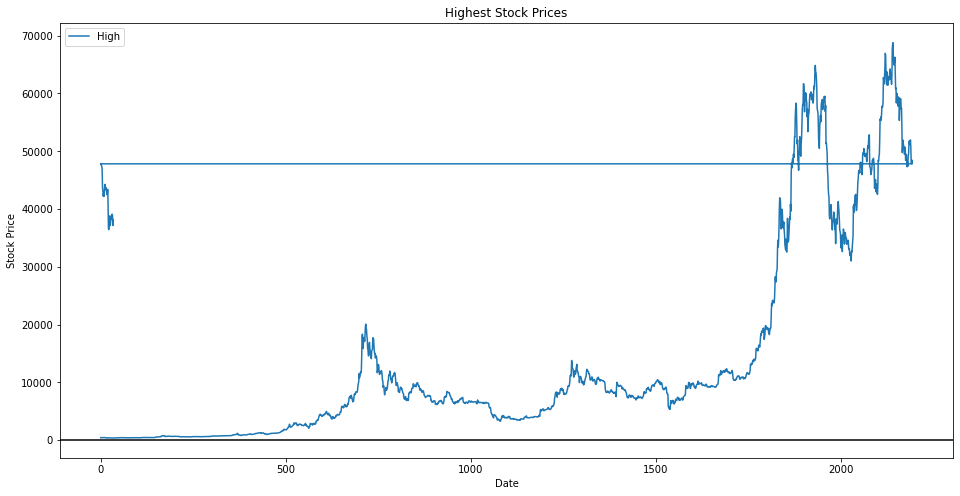

In [21]:
# Plot function for the High Price
def plot_adj(df,title):
        ax = df['High'].plot(title=title, figsize=(16,8), ax=None)
        ax.set_xlabel("Date")
        ax.set_ylabel("Stock Price")
        ax.axhline(color='black')
        ax.legend(loc='upper left')
        plt.show()
# View the plot of High price       
plot_adj(df,"Highest Stock Prices")

In [25]:
# view all stocks adjusted close price from Jan 2016 to Aug 2021
df['Adj Close']

0       434.334015
1       433.437988
2       430.010986
3       433.091003
4       431.959991
          ...     
30    38483.125000
31    38743.273438
32    36952.984375
33    37154.601563
34    37649.335938
Name: Adj Close, Length: 2228, dtype: float64

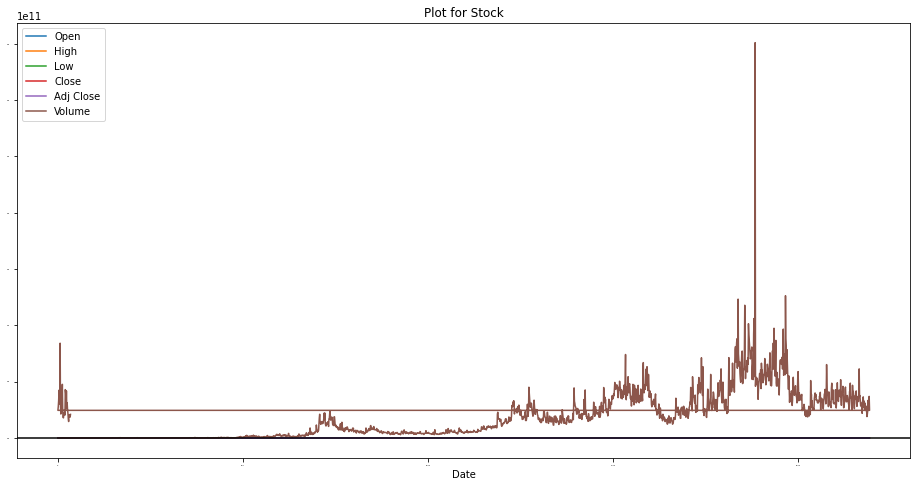

In [27]:
# create function to plot data
def plot_data1(df,title,ylabel='Stock Price',y=0):
    """This funtion plots stock prices"""
    ax = df.plot(title=title, figsize=(16,8), ax=None, fontsize=2)
    ax.set_xlabel("Date")
    ax.set_label(ylabel)
    ax.axhline(y=y,color='black')
    ax.legend( loc='upper left')
    plt.show()
    
plot_data1(df,"Plot for Stock")

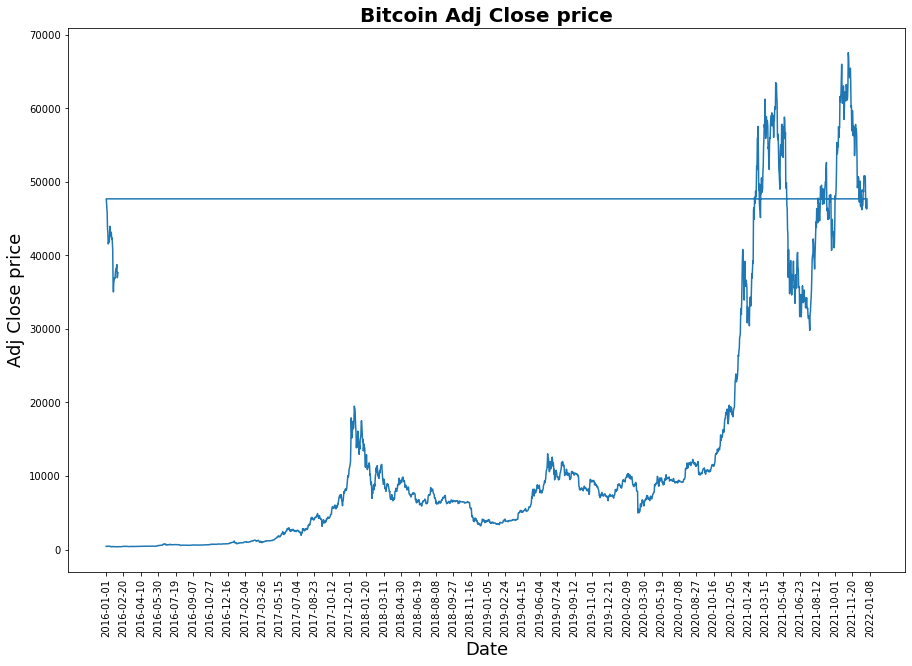

In [38]:
#Creating a dataframe for Adjusted close price column as it's our target variable to predict

price = df[['Adj Close']]

#plotting the price for the historical data of bitcoin
plt.figure(figsize=(15,10))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=90)
plt.title("Bitcoin Adj Close price", fontsize=20, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price', fontsize=18)
plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()# This return default by the value between 0 to 10
norm_data = min_max_scaler.fit_transform(price.values
                                        )

In [42]:
norm_data

array([[0.00104167],
       [0.00102834],
       [0.00097734],
       ...,
       [0.54445378],
       [0.54745392],
       [0.55481577]])

In [43]:
print(f"Real: {price.values[0]}, Normalized: {norm_data[0]}")
print(f"Real: {price.values[50]}, Normalized: {norm_data[50]}")
print(f"Real: {price.values[100]}, Normalized: {norm_data[100]}")
print(f"Real: {price.values[500]}, Normalized: {norm_data[500]}")
print(f"Real: {price.values[900]}, Normalized: {norm_data[900]}")

Real: [434.334015], Normalized: [0.00104167]
Real: [437.164001], Normalized: [0.00108378]
Real: [421.563995], Normalized: [0.00085165]
Real: [1738.430054], Normalized: [0.02044714]
Real: [6769.939941], Normalized: [0.09531802]


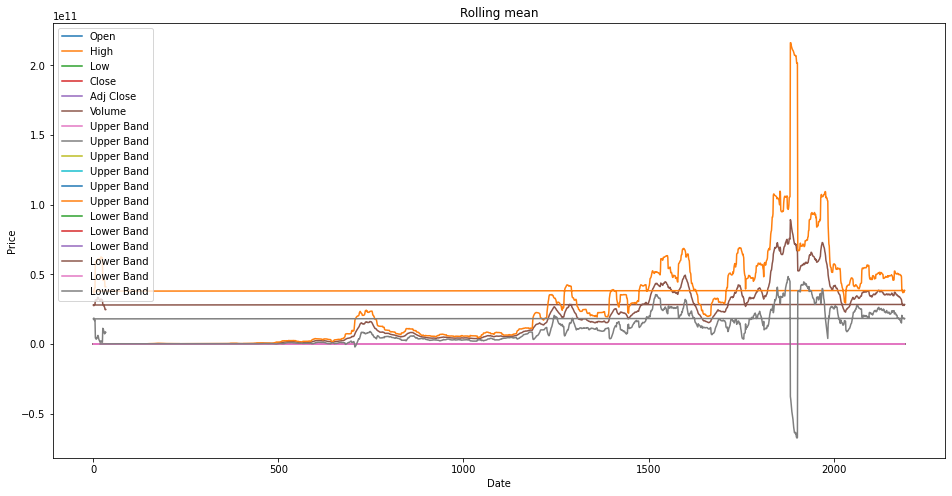

In [51]:
### The rolling mean may give us some idea about the true underlying
###  prices of a stock. If there is a significant deviation below or
### above the rolling mean, it may give us an idea about a potential 
### buying and selling opportunity respectively.
### The challenge remains to know when this deviation is significant 
### enough to pay attention to it. 
### Bollinger Bands is a statistical chart that contains the 
### volatility of a financial instrument over time. 
### Bollinger observed that looking at the recent volatility of the 
### stock, if it is very volatile, we might discard the movement 
### above and below the mean. But if it is not very volatile 
### we may want to pay attention to it. added a band $2\delta$ 
### (2 standard deviations) above and below the mean.
### use the rolling standard deviation to help us achieve this.
### compute rolling mean, rolling standard deviation, upper and lower bands


def rolling_stats(df, window = 20):
    """
    This function computes the rolling mean and Bollinger bands
    inputs : 
    df - dataframe
    stocks - the type of stocks we would be analyzing
    type_ - the price type of the rolling calculation
    window - number of days used to calculate the statistics
    output: 
    rolling mean, rolling standard deviation, upper and lower bands of 2 std each
    """
    
    val = df
    rolling_mean = df.rolling(window=window).mean()
    rolling_std = df.rolling(window=window).std()
    upper_band = rolling_mean + rolling_std*2
    lower_band = rolling_mean - rolling_std*2
    
    return val, rolling_mean, rolling_std, upper_band, lower_band
    

# plot the rolling mean, rolling standard deviation, upper and lower bands
def rolling_plot( val, rolling_mean, upper_band, lower_band, title='Rolling mean'):
    """
    This function plots the rolling mean and Bollinger bands
    inputs : 
    stocks - the type of stocks we would be analyzing
    val - value of the stock price type
    rolling_mean - rolling mean
    upper_band - stocks upper band
    lower_band - stocks lower band
    title - plot title
    output: 
    plot of rolling mean, rolling standard deviation, upper and lower bands of 2 std each
    """
    
    ax = rolling_mean.plot(title=title, figsize=(16,8), label='Rolling Mean')
    plt.plot(upper_band, label = 'Upper Band')
    plt.plot(lower_band, label = 'Lower Band')
    plt.plot( label = 'Value of Stock')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    plt.show()
    
    return ax



val,rolling_mean, rolling_std, upper_band, lower_band = rolling_stats(df)

rolling_plot( val, rolling_mean, upper_band, lower_band, title='Rolling mean')
plt.show()



In [66]:
#view the shape
print(df.shape)


# create the variables for prediction and split into training and 
# test sets

y = np.log(df['Adj Close'].astype(int)) # we want to predict the adjusted close price
X = df.drop('Adj Close', axis=1) # predictive variables (removing Adj close from it)


(2228, 7)


# Model Building

In [94]:
def univariate_data(dataset,start_index, end_index, history_size, target_size):
    data=[]
    label = []
    
    start_index = start_index+history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        data.append(np.reshape(dataset[indices],(history_size,1)))
        label.append(dataset[i+target_size])
        
    return np.array(data), np.array(label)



past_history = 5
future_target = 0

#We need to use 5 days of data to learn to predict the next point in the time series "Future_target"

TRAIN_SPLIT = int(len(norm_data) * 0.8)#Last index of the 80% data used for training
X_train,y_train = univariate_data(norm_data,
                                 0,
                                 TRAIN_SPLIT,
                                 past_history,
                                 future_target)

X_test,y_test = univariate_data(norm_data,
                               TRAIN_SPLIT,
                               None,
                                past_history,
                                future_target)

In [111]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.metrics import mean_squared_error
from keras.layers.recurrent import LSTM
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU


In [112]:
num_unit = 64 #Number of neurons
learning_rate = 0.0001
activation_function = 'sigmoid'
adam = Adam(lr=learning_rate)
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 220

C:\Users\princ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [115]:
#Initializing the RNN
model = Sequential()

#In keras we can simply stack multiple layers on the top of each other, for this we need to initialize the model as sequential().
model.add(LSTM(units = num_unit, activation = activation_function, input_shape = (None,1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1)) # This Layer will prevent overfitting
model.add(Dense(units = 1))# Fully connected


#Compliling the RNN
model.compile(optimizer = adam, loss = loss_function)

### Let's see how our Architecture Look like

In [116]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [117]:
history = model.fit(X_train,
                   y_train,
                   validation_split=0.1,
                   batch_size = batch_size,
                   epochs = num_epochs,
                   shuffle = False
                   )

Epoch 1/220
320/320 [==============================] - 8s 12ms/step - loss: 0.0302 - val_loss: 0.0031
Epoch 2/220
320/320 [==============================] - 3s 11ms/step - loss: 0.0253 - val_loss: 0.0021
Epoch 3/220
320/320 [==============================] - 3s 11ms/step - loss: 0.0224 - val_loss: 0.0016
Epoch 4/220
320/320 [==============================] - 3s 11ms/step - loss: 0.0192 - val_loss: 0.0027
Epoch 5/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0192 - val_loss: 0.0031
Epoch 6/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0176 - val_loss: 0.0033
Epoch 7/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0166 - val_loss: 0.0028
Epoch 8/220
320/320 [==============================] - 3s 11ms/step - loss: 0.0153 - val_loss: 0.0019
Epoch 9/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0143 - val_loss: 0.0032
Epoch 10/220
320/320 [==============================] - 3s 10ms/step - loss: 0.013

320/320 [==============================] - 3s 10ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 81/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 82/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 83/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 84/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 85/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 86/220
320/320 [==============================] - 3s 11ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 87/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 88/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 89/220
320/320 [==============================] - 3s 10ms/step - loss: 0.0014 - 

320/320 [==============================] - 3s 11ms/step - loss: 4.4369e-04 - val_loss: 7.7512e-04
Epoch 158/220
320/320 [==============================] - 3s 11ms/step - loss: 4.1821e-04 - val_loss: 7.2604e-04
Epoch 159/220
320/320 [==============================] - 3s 11ms/step - loss: 4.0015e-04 - val_loss: 7.2396e-04
Epoch 160/220
320/320 [==============================] - 3s 11ms/step - loss: 4.0828e-04 - val_loss: 7.2951e-04
Epoch 161/220
320/320 [==============================] - 3s 11ms/step - loss: 3.7417e-04 - val_loss: 7.2239e-04
Epoch 162/220
320/320 [==============================] - 3s 11ms/step - loss: 3.6423e-04 - val_loss: 6.8051e-04
Epoch 163/220
320/320 [==============================] - 3s 11ms/step - loss: 3.5877e-04 - val_loss: 5.4951e-04
Epoch 164/220
320/320 [==============================] - 3s 11ms/step - loss: 3.5193e-04 - val_loss: 5.4136e-04
Epoch 165/220
320/320 [==============================] - 3s 11ms/step - loss: 3.3907e-04 - val_loss: 5.2630e-04
Epoch 

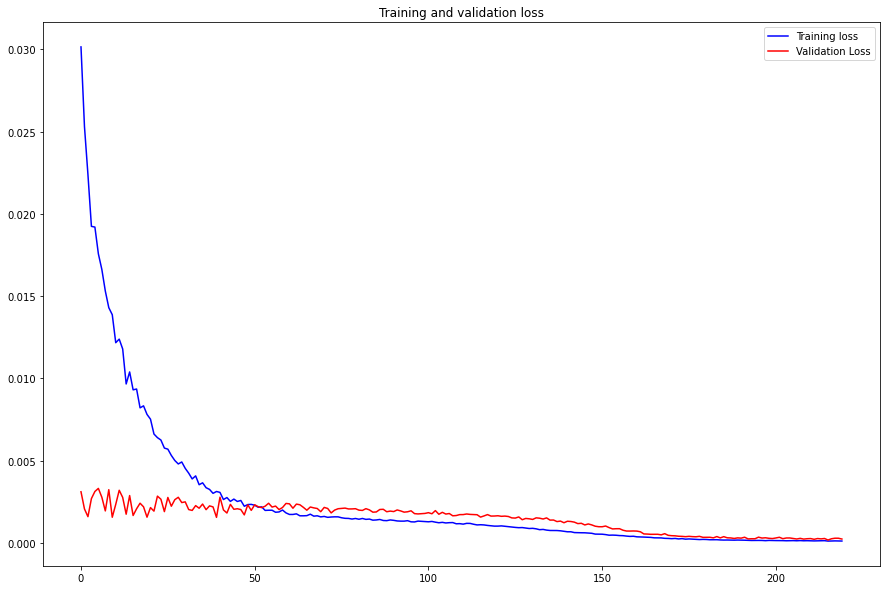

In [118]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize = (15,10))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')

plt.title("Training and validation loss")
plt.legend()
plt.show()

## Prediction

##### For each of the item we used for the validation, So let's predict them so we can compare how well we did

###### With our model now trained , we can start some predictions ans evaluating those predictions to our test data to see how well we our model doing

[Text(-100.0, 0, ''),
 Text(0.0, 0, ''),
 Text(100.0, 0, ''),
 Text(200.0, 0, ''),
 Text(300.0, 0, ''),
 Text(400.0, 0, ''),
 Text(500.0, 0, '')]

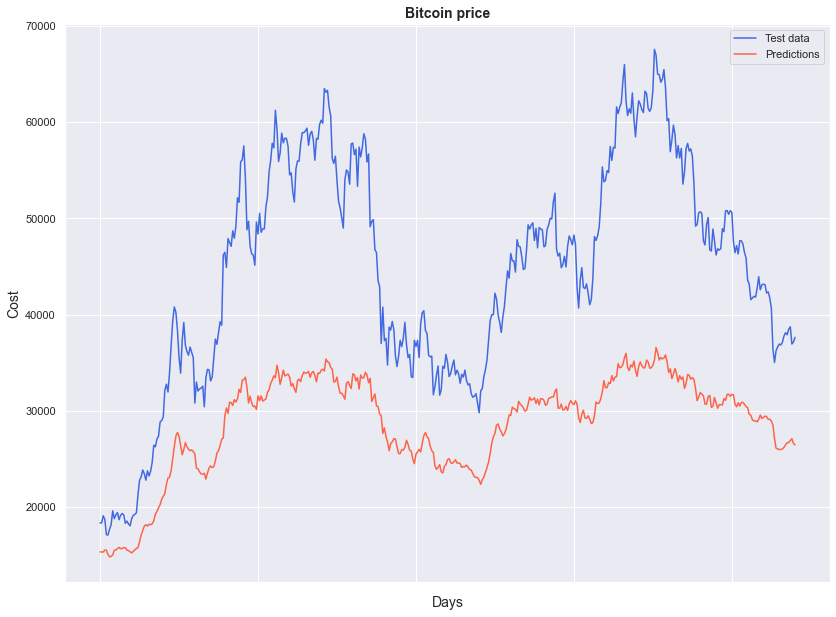

In [121]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(X_test)))
sns.set(rc = {"figure.figsize":(11.7+2,8.27+2)})
ax = sns.lineplot(x = original.index, y = original[0], label = "Test data", color = "royalblue")
ax = sns.lineplot(x = original.index, y = predictions[0], label = "Predictions", color = "tomato")
ax.set_title('Bitcoin price', size=14,fontweight = 'bold')
ax.set_xlabel('Days', size=14)
ax.set_ylabel('Cost',size= 14)
ax.set_xticklabels('',size=10)